In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets

# podešavanja ispisa
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)
celzijusi = u'\N{DEGREE SIGN}C' # oznaka za stepene celzijusa

In [2]:
# učitavanje u dataframe format
df = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')

# format podataka
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()

shape: 
 (35064, 18)

 types:
 No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object 



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.00,6.00,4.00,8.00,300.00,81.00,-0.50,1024.50,-21.40,0.00,NNW,5.70,Tiantan
1,2,2013,3,1,1,6.00,29.00,5.00,9.00,300.00,80.00,-0.70,1025.10,-22.10,0.00,NW,3.90,Tiantan
2,3,2013,3,1,2,6.00,6.00,4.00,12.00,300.00,75.00,-1.20,1025.30,-24.60,0.00,NNW,5.30,Tiantan
3,4,2013,3,1,3,6.00,6.00,4.00,12.00,300.00,74.00,-1.40,1026.20,-25.50,0.00,N,4.90,Tiantan
4,5,2013,3,1,4,5.00,5.00,7.00,15.00,400.00,70.00,-1.90,1027.10,-24.50,0.00,NNW,3.20,Tiantan


In [3]:
#brisemo obelezja Tiantan i No
df.drop(['station'], inplace= True, axis = 1)
df.drop(['No'], inplace= True, axis = 1)
df.head()
df.shape


(35064, 16)

In [4]:
#nedostajuci podaci
a=df.isnull().sum()
print(a)
udeo=df.isnull().sum()/len(df)*100
print("\n U procentima: \n",udeo)

year        0
month       0
day         0
hour        0
PM2.5     677
PM10      597
SO2      1118
NO2       744
CO       1126
O3        843
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         78
WSPM       14
dtype: int64

 U procentima: 
 year    0.00
month   0.00
day     0.00
hour    0.00
PM2.5   1.93
PM10    1.70
SO2     3.19
NO2     2.12
CO      3.21
O3      2.40
TEMP    0.06
PRES    0.06
DEWP    0.06
RAIN    0.06
wd      0.22
WSPM    0.04
dtype: float64


In [5]:
#izbacujemo 20 uzoraka kojima nedostaju obelezja TEMP,PRES,DEWP,RAIN
df= df.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN','WSPM'])
df.shape



(35044, 16)

In [6]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,6.00,6.00,4.00,8.00,300.00,81.00,-0.50,1024.50,-21.40,0.00,NNW,5.70
1,2013,3,1,1,6.00,29.00,5.00,9.00,300.00,80.00,-0.70,1025.10,-22.10,0.00,NW,3.90
2,2013,3,1,2,6.00,6.00,4.00,12.00,300.00,75.00,-1.20,1025.30,-24.60,0.00,NNW,5.30
3,2013,3,1,3,6.00,6.00,4.00,12.00,300.00,74.00,-1.40,1026.20,-25.50,0.00,N,4.90
4,2013,3,1,4,5.00,5.00,7.00,15.00,400.00,70.00,-1.90,1027.10,-24.50,0.00,NNW,3.20


In [7]:
#dopunjujemo nedostajuce vrednosti 
#dopunjujem prethodno validnom vrednoscu jer obelezja za koje nedostjau vrednosti se ne menja jako brzo
#pregledom baze sam zakljucila 
df['PM2.5'].fillna(method='ffill', inplace=True)
df['PM10'].fillna(method='ffill', inplace=True)
df['SO2'].fillna(method='ffill', inplace=True)
df['NO2'].fillna(method='ffill', inplace=True)
df['CO'].fillna(method='ffill', inplace=True)
df['O3'].fillna(method='ffill', inplace=True)
df['wd'].fillna(method='ffill', inplace=True)

        
    

In [8]:
#analiza statistickih velicina
df.describe()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00
mean,2014.66,6.52,15.73,11.50,82.26,106.66,14.48,53.24,1308.17,56.47,13.67,1012.55,2.45,0.06,1.86
std,1.18,3.45,8.80,6.92,81.15,90.45,20.51,32.00,1184.52,60.85,11.46,10.27,13.81,0.79,1.28
min,2013.00,1.00,1.00,0.00,3.00,2.00,0.57,2.00,100.00,0.43,-16.80,987.10,-35.30,0.00,0.00
25%,2014.00,4.00,8.00,5.00,22.00,41.00,3.00,28.00,500.00,8.00,3.10,1004.00,-8.80,0.00,1.00
50%,2015.00,7.00,16.00,11.00,58.00,85.00,7.00,47.00,900.00,41.00,14.60,1012.20,3.00,0.00,1.50
75%,2016.00,10.00,23.00,17.00,114.00,144.00,17.00,71.00,1600.00,81.87,23.50,1020.90,15.00,0.00,2.40
max,2017.00,12.00,31.00,23.00,821.00,988.00,273.00,241.00,10000.00,674.00,41.10,1042.00,28.80,46.40,10.50


In [9]:
df_year = df.set_index('year')
df_year.head()
df_year.tail()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year,,,,,,,,,,,,,,,
2017,2,28,19,20.00,48.00,2.00,21.00,500.00,94.00,12.50,1013.50,-16.20,0.00,NW,2.40
2017,2,28,20,11.00,34.00,3.00,36.00,500.00,94.00,11.60,1013.60,-15.10,0.00,WNW,0.90
2017,2,28,21,18.00,32.00,4.00,48.00,500.00,48.00,10.80,1014.20,-13.30,0.00,NW,1.10
2017,2,28,22,15.00,42.00,5.00,52.00,600.00,44.00,10.50,1014.40,-12.90,0.00,NNW,1.20
2017,2,28,23,15.00,50.00,5.00,68.00,700.00,21.00,8.60,1014.10,-15.90,0.00,NNE,1.30


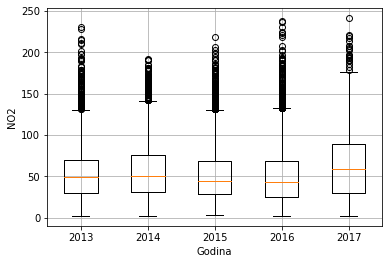

In [10]:
plt.figure()
plt.boxplot([df_year.loc['2013','NO2'],df_year.loc['2014','NO2'],df_year.loc['2015','NO2'],df_year.loc['2016','NO2'],df_year.loc['2017','NO2']]) 
plt.ylabel('NO2')
plt.xlabel('Godina')
plt.xticks([1,2,3,4,5], ["2013","2014","2015","2016","2017"])
plt.grid()

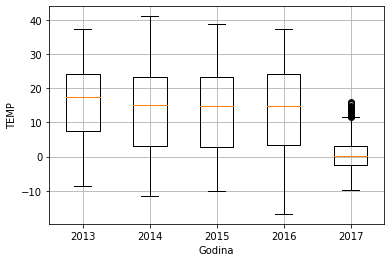

In [11]:
plt.figure()
plt.boxplot([df_year.loc['2013','TEMP'],df_year.loc['2014','TEMP'],df_year.loc['2015','TEMP'],df_year.loc['2016','TEMP'],df_year.loc['2017','TEMP']]) 
plt.ylabel('TEMP')
plt.xlabel('Godina')
plt.xticks([1,2,3,4,5], ["2013","2014","2015","2016","2017"])
plt.grid()

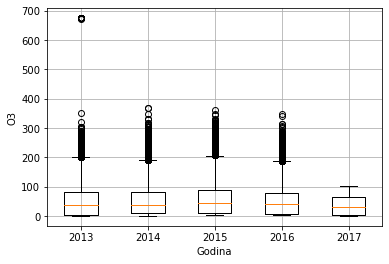

In [12]:
plt.figure()
plt.boxplot([df_year.loc['2013','O3'],df_year.loc['2014','O3'],df_year.loc['2015','O3'],df_year.loc['2016','O3'],df_year.loc['2017','O3']]) 
plt.ylabel('O3')
plt.xlabel('Godina')
plt.xticks([1,2,3,4,5], ["2013","2014","2015","2016","2017"])
plt.grid()

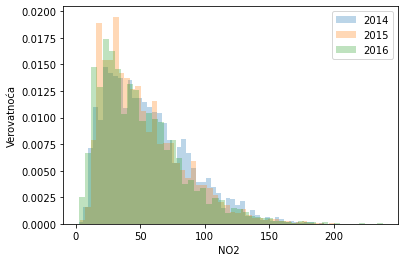

In [13]:
# histogram
#plt.hist(df_year.loc[2013,'NO2'], bins=50, density=True, alpha=0.3, label='2013')
plt.hist(df_year.loc[2014,'NO2'], bins=50, density=True, alpha=0.3, label='2014')
plt.hist(df_year.loc[2015,'NO2'], bins=50, density=True, alpha=0.3, label='2015')
plt.hist(df_year.loc[2016,'NO2'], bins=50, density=True, alpha=0.3, label='2016')
#plt.hist(df_year.loc[2017,'NO2'], bins=50, density=True, alpha=0.3, label='2017')

plt.xlabel('NO2 ')
plt.ylabel('Verovatnoća')
plt.legend(loc='upper right')

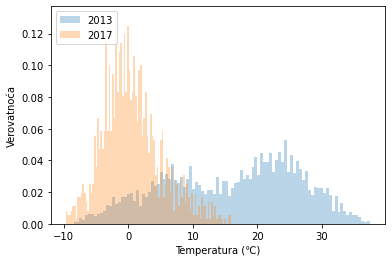

In [14]:
# histogram
plt.hist(df_year.loc[2013,'TEMP'], bins=100, density=True, alpha=0.3, label='2013')
plt.hist(df_year.loc[2017,'TEMP'], bins=100, density=True, alpha=0.3, label='2017')

plt.xlabel('Temperatura (℃)')
plt.ylabel('Verovatnoća')
plt.legend(loc='upper left')

Text(0, 0.5, 'Koncentracija NO2[µg/m³]')

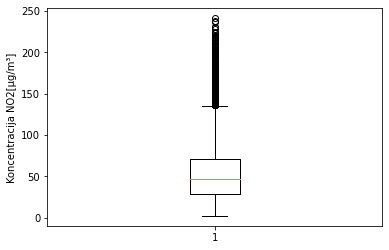

In [15]:
plt.figure(),plt.boxplot(df['NO2'])
plt.ylabel('Koncentracija NO2[µg/m³]')


(<Figure size 432x288 with 0 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb55d070>)

<Figure size 432x288 with 0 Axes>

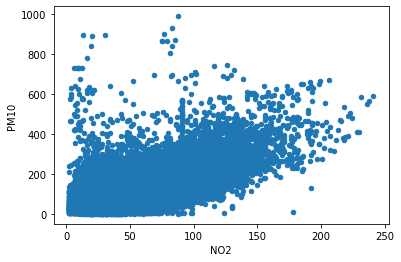

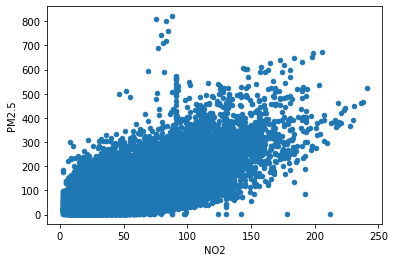

<Figure size 432x288 with 0 Axes>

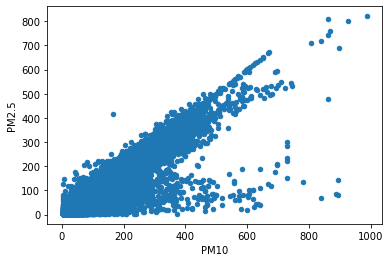

In [16]:
#plt.figure(), df_year.plot.scatter(x='TEMP',y='NO2')
#plt.figure(), df_year.plot.scatter(x='NO2',y='CO')
plt.figure(), df_year.plot.scatter(x='NO2',y='PM10')
df_year.plot.scatter(x='NO2',y='PM2.5')
#plt.figure(), df_year.plot.scatter(x='NO2',y='SO2')
#plt.figure(), df_year.plot.scatter(x='NO2',y='O3')
#plt.figure(), df_year.plot.scatter(x='NO2',y='WSPM')
#plt.figure(), df_year.plot.scatter(x='TEMP',y='DEWP')
#plt.figure(), df_year.plot.scatter(x='TEMP',y='PRES')
plt.figure(), df_year.plot.scatter(x='PM10',y='PM2.5')
#plt.figure(), df_year.plot.scatter(x='PRES',y='DEWP')

In [ ]:
df_temp = df.groupby(by=['year', 'month']).mean()
#print(df_rain)
#T_2013 = df_pres.loc[2013]['PRES']
T_2014 = df_temp.loc[2014]['TEMP']
T_2015 = df_temp.loc[2015]['TEMP']
T_2016 = df_temp.loc[2016]['TEMP']
#T_2017 = df_pres.loc[2017]['PRES']

#plt.plot(np.arange(1, 13, 1), T_2013, 'g', label='2013')
plt.plot(np.arange(1, 13, 1), T_2014, 'b', label='2014')
plt.plot(np.arange(1, 13, 1), T_2015, 'r', label='2015')
plt.plot(np.arange(1, 13, 1), T_2016, 'c', label='2016')
#plt.plot(np.arange(1, 13, 1), T_2017, 'm', label='2017')

plt.ylabel('Temperatura')
plt.xlabel('Mesec')
plt.legend()



In [ ]:
df_pres = df.groupby(by=['year', 'month']).mean()
#print(df_rain)
#T_2013 = df_pres.loc[2013]['PRES']
P_2014 = df_pres.loc[2014]['PRES']
P_2015 = df_pres.loc[2015]['PRES']
P_2016 = df_pres.loc[2016]['PRES']
#T_2017 = df_pres.loc[2017]['PRES']

#plt.plot(np.arange(1, 13, 1), P_2013, 'g', label='2013')
plt.plot(np.arange(1, 13, 1), P_2014, 'b', label='2014')
plt.plot(np.arange(1, 13, 1), P_2015, 'r', label='2015')
plt.plot(np.arange(1, 13, 1), P_2016, 'c', label='2016')
#plt.plot(np.arange(1, 13, 1), P_2017, 'Y', label='2017')

plt.ylabel('Pritisak')
plt.xlabel('Mesec')
plt.legend()


In [ ]:
df_pm10 = df.groupby(by=['year', 'month']).mean()
#print(df_rain)
#PM10_2013 = df_pres.loc[2013]['PM10']
PM10_2014 = df_pres.loc[2014]['PM10']
PM10_2015 = df_pres.loc[2015]['PM10']
PM10_2016 = df_pres.loc[2016]['PM10']
#PM10_2017 = df_pres.loc[2017]['PM10']

#plt.plot(np.arange(1, 13, 1), T_2013, 'g', label='2013')
plt.plot(np.arange(1, 13, 1), PM10_2014, 'b', label='2014')
plt.plot(np.arange(1, 13, 1), PM10_2015, 'r', label='2015')
plt.plot(np.arange(1, 13, 1), PM10_2016, 'c', label='2016')
#plt.plot(np.arange(1, 13, 1), PM10_2017, 'm', label='2017')

plt.ylabel('PM10')
plt.xlabel('Mesec')


In [ ]:
df_pm2_5 = df.groupby(by=['year', 'month']).mean()
#print(df_rain)
#PM25_2013 = df_pres.loc[2013]['PRES']
PM25_2014 = df_pres.loc[2014]['PM2.5']
PM25_2015 = df_pres.loc[2015]['PM2.5']
PM25_2016 = df_pres.loc[2016]['PM2.5']
#PM25_2017 = df_pres.loc[2017]['PRES']

#plt.plot(np.arange(1, 13, 1), PM25_2013, 'g', label='2013')
plt.plot(np.arange(1, 13, 1), PM25_2014, 'b', label='2014')
plt.plot(np.arange(1, 13, 1), PM25_2015, 'r', label='2015')
plt.plot(np.arange(1, 13, 1), PM25_2016, 'c', label='2016')
#plt.plot(np.arange(1, 13, 1), PM25_2017, 'm', label='2017')

plt.ylabel('PM2.5')
plt.xlabel('Mesec')


In [ ]:
df_wd = df.set_index('wd')
df_wd.head()

In [ ]:
plt.figure()
plt.boxplot([df_wd.loc['E','NO2'],df_wd.loc['ENE','NO2'],df_wd.loc['ESE','NO2'],df_wd.loc['N','NO2'],df_wd.loc['NE','NO2'],df_wd.loc['NNE','NO2'],df_wd.loc['NNW','NO2'],df_wd.loc['NW','NO2'],df_wd.loc['S','NO2'],df_wd.loc['SE','NO2'],df_wd.loc['SSE','NO2'],df_wd.loc['SSW','NO2'],df_wd.loc['SW','NO2'],df_wd.loc['W','NO2'],df_wd.loc['WNW','NO2'],df_wd.loc['WSW','NO2']]) 
plt.ylabel('NO2')
plt.xlabel('Pravac vetra')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ["E","ENE","ESE","N","NE","NNE","NNW","NW","S","SE","SSE","SSW","SW","W","WNW","WSW"])
plt.grid()

In [ ]:
matrica_korelacije = df.corr() 
print(matrica_korelacije)

In [39]:
import seaborn as sb
plt.figure(figsize=(20,10))

sb.heatmap(matrica_korelacije, annot=True)

NameError: name 'matrica_korelacije' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
matrica_korelacije = df.corr() 
print(matrica_korelacije['NO2'])


In [18]:
x=df.drop(['NO2'],axis=1)
y=df['NO2']
print(x.shape)
print(x.columns)
x.head()

(35044, 15)
Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'CO', 'O3',
       'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'],
      dtype='object')


,year,month,day,hour,PM2.5,PM10,SO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,6.00,6.00,4.00,300.00,81.00,-0.50,1024.50,-21.40,0.00,NNW,5.70
1,2013,3,1,1,6.00,29.00,5.00,300.00,80.00,-0.70,1025.10,-22.10,0.00,NW,3.90
2,2013,3,1,2,6.00,6.00,4.00,300.00,75.00,-1.20,1025.30,-24.60,0.00,NNW,5.30
3,2013,3,1,3,6.00,6.00,4.00,300.00,74.00,-1.40,1026.20,-25.50,0.00,N,4.90
4,2013,3,1,4,5.00,5.00,7.00,400.00,70.00,-1.90,1027.10,-24.50,0.00,NNW,3.20


In [ ]:
gb=df.groupby('wd').mean()
gb

In [ ]:
v=gb['NO2']
v

In [ ]:
sorted(v)


In [19]:
x.loc[x['wd']=='NW','wd']=1
x.loc[x['wd']=='NNW','wd']=2
x.loc[x['wd']=='WNW','wd']=3
x.loc[x['wd']=='SSW','wd']=4
x.loc[x['wd']=='SW','wd']=5
x.loc[x['wd']=='S','wd']=6
x.loc[x['wd']=='WSW','wd']=7
x.loc[x['wd']=='N','wd']=8
x.loc[x['wd']=='SSE','wd']=9
x.loc[x['wd']=='W','wd']=10
x.loc[x['wd']=='SE','wd']=11
x.loc[x['wd']=='NNE','wd']=12
x.loc[x['wd']=='ESE','wd']=13
x.loc[x['wd']=='NE','wd']=14
x.loc[x['wd']=='E','wd']=15
x.loc[x['wd']=='ENE','wd']=16
print(sorted(x['wd'].unique()))
x['wd']=x['wd'].astype(str).astype(int)
x.head()





[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


,year,month,day,hour,PM2.5,PM10,SO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,6.00,6.00,4.00,300.00,81.00,-0.50,1024.50,-21.40,0.00,2,5.70
1,2013,3,1,1,6.00,29.00,5.00,300.00,80.00,-0.70,1025.10,-22.10,0.00,1,3.90
2,2013,3,1,2,6.00,6.00,4.00,300.00,75.00,-1.20,1025.30,-24.60,0.00,2,5.30
3,2013,3,1,3,6.00,6.00,4.00,300.00,74.00,-1.40,1026.20,-25.50,0.00,8,4.90
4,2013,3,1,4,5.00,5.00,7.00,400.00,70.00,-1.90,1027.10,-24.50,0.00,2,3.20


In [20]:
x.wd

0         2
1         1
2         2
3         8
4         2
         ..
35059     1
35060     3
35061     1
35062     2
35063    12
Name: wd, Length: 35044, dtype: int32

In [21]:
dh = x.set_index('wd')
dh.head()

,year,month,day,hour,PM2.5,PM10,SO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
wd,,,,,,,,,,,,,,
2,2013,3,1,0,6.00,6.00,4.00,300.00,81.00,-0.50,1024.50,-21.40,0.00,5.70
1,2013,3,1,1,6.00,29.00,5.00,300.00,80.00,-0.70,1025.10,-22.10,0.00,3.90
2,2013,3,1,2,6.00,6.00,4.00,300.00,75.00,-1.20,1025.30,-24.60,0.00,5.30
8,2013,3,1,3,6.00,6.00,4.00,300.00,74.00,-1.40,1026.20,-25.50,0.00,4.90
2,2013,3,1,4,5.00,5.00,7.00,400.00,70.00,-1.90,1027.10,-24.50,0.00,3.20


In [ ]:
print(x['wd'])

In [22]:
print(x.isnull().sum().sum())

0


In [23]:
x.describe()

,year,month,day,hour,PM2.5,PM10,SO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00,35044.00
mean,2014.66,6.52,15.73,11.50,82.26,106.66,14.48,1308.17,56.47,13.67,1012.55,2.45,0.06,9.52,1.86
std,1.18,3.45,8.80,6.92,81.15,90.45,20.51,1184.52,60.85,11.46,10.27,13.81,0.79,4.98,1.28
min,2013.00,1.00,1.00,0.00,3.00,2.00,0.57,100.00,0.43,-16.80,987.10,-35.30,0.00,1.00,0.00
25%,2014.00,4.00,8.00,5.00,22.00,41.00,3.00,500.00,8.00,3.10,1004.00,-8.80,0.00,5.00,1.00
50%,2015.00,7.00,16.00,11.00,58.00,85.00,7.00,900.00,41.00,14.60,1012.20,3.00,0.00,10.00,1.50
75%,2016.00,10.00,23.00,17.00,114.00,144.00,17.00,1600.00,81.87,23.50,1020.90,15.00,0.00,14.00,2.40
max,2017.00,12.00,31.00,23.00,821.00,988.00,273.00,10000.00,674.00,41.10,1042.00,28.80,46.40,16.00,10.50


In [24]:
y.describe()

count   35044.00
mean       53.24
std        32.00
min         2.00
25%        28.00
50%        47.00
75%        71.00
max       241.00
Name: NO2, dtype: float64

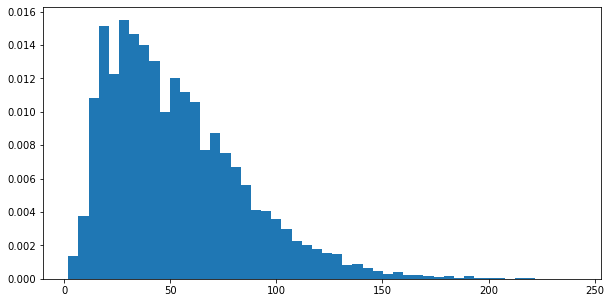

In [25]:
plt.figure(figsize=(10,5))
plt.hist(y, density=True, bins=50)
plt.show()

In [26]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) 
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [27]:
#izbacujem obelezja PRES i RAIN jer im je vrednost za P veca od praga 0.01
#izbacujem obelezja PRES i RAIN jer im je vrednost za P veca od praga 0.01
#prvo radim LR bez izbacivanja obelezja,a potom se vracam i izbacujem PRES(P=0.231),a sledeci put i RAIN(P=0.007)

#x=x.drop(['PRES'],axis=1)
x=x.drop(['RAIN'],axis=1)

In [28]:
# podela skupa na trening i test podatke
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


Mean squared error:  296.11645253424825
Mean absolute error:  12.695463881194835
Root mean squared error:  17.20803453431705
R2 score:  0.707474882081278
R2 adjusted score:  0.7073449698984693
        y  y_pred
0   59.00   52.02
1   18.00   28.60
2   55.00   40.88
3   41.00   46.50
4   41.00   42.13
5   79.00   58.59
6   28.00   34.65
7   72.00  108.15
8   63.00   56.67
9   13.00   20.65
10  46.00   57.19
11  28.00   43.74
12  60.00   64.74
13  53.00   75.84
14 105.00   91.07
15   8.00   26.71
16  49.00   49.25
17  17.00   24.08
18  69.00   97.80
19  15.00   23.58
koeficijenti:  [ 0.65546586  0.21438429  0.04835278  0.36154134  0.06428362  0.06146752
  0.23074891  0.00768303 -0.22547067  0.78513263 -0.02084263 -0.56215167
  0.27562599 -4.04641915]


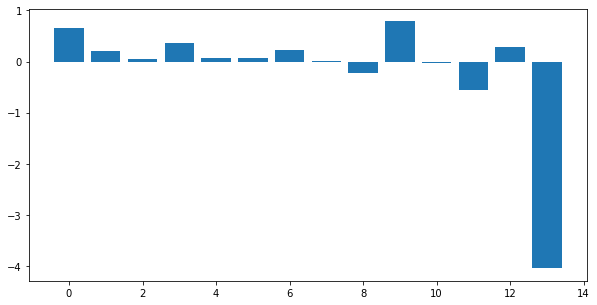

In [29]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(x_train, y_train)

# Testiranje
y_predicted = first_regression_model.predict(x_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
print("koeficijenti: ", first_regression_model.coef_)

Mean squared error:  296.1165554515184
Mean absolute error:  12.69545758435404
Root mean squared error:  17.20803752470102
R2 score:  0.7074747804122005
R2 adjusted score:  0.7073448681842399
        y  y_pred
0   59.00   52.02
1   18.00   28.60
2   55.00   40.87
3   41.00   46.50
4   41.00   42.13
5   79.00   58.59
6   28.00   34.65
7   72.00  108.15
8   63.00   56.67
9   13.00   20.65
10  46.00   57.19
11  28.00   43.74
12  60.00   64.74
13  53.00   75.84
14 105.00   91.07
15   8.00   26.71
16  49.00   49.25
17  17.00   24.08
18  69.00   97.80
19  15.00   23.58
koeficijenti:  [ 0.65537508  0.21436215  0.04835318  0.36154339  0.06428482  0.06146597
  0.23074843  0.00768311 -0.22547306  0.78509454 -0.02083933 -0.56210542
  0.27565306 -4.0457737 ]


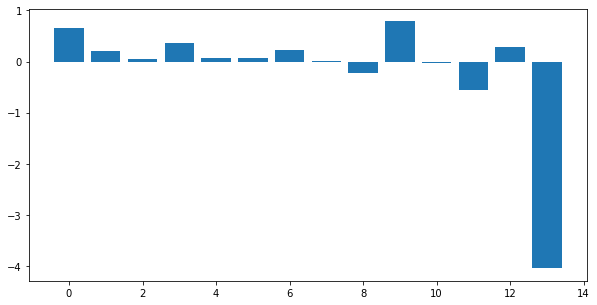

In [30]:
# Primer 5: Ridge regresija

# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  296.1135325340243
Mean absolute error:  12.69513051028597
Root mean squared error:  17.20794969001317
R2 score:  0.7074777666674013
R2 adjusted score:  0.7073478557656547
        y  y_pred
0   59.00   52.02
1   18.00   28.60
2   55.00   40.88
3   41.00   46.50
4   41.00   42.12
5   79.00   58.61
6   28.00   34.63
7   72.00  108.12
8   63.00   56.67
9   13.00   20.64
10  46.00   57.21
11  28.00   43.73
12  60.00   64.74
13  53.00   75.85
14 105.00   91.08
15   8.00   26.73
16  49.00   49.23
17  17.00   24.07
18  69.00   97.78
19  15.00   23.59
koeficijenti:  [ 0.64574454  0.2118974   0.0482018   0.36144059  0.06427214  0.06146306
  0.23053596  0.00768593 -0.2254855   0.78410295 -0.02005335 -0.56065555
  0.27537665 -4.03589731]


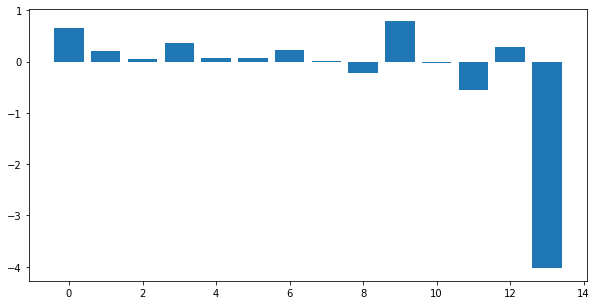

In [31]:
# Primer 6: Lasso regresija

# Lasso regresija

# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

In [32]:
# Selekcija obelezja
import statsmodels.api as sm
X = sm.add_constant(x_train)
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NO2   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     5514.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:46:58   Log-Likelihood:            -1.3455e+05
No. Observations:               31539   AIC:                         2.691e+05
Df Residuals:                   31524   BIC:                         2.693e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1269.4143    179.310     -7.079      0.000   -1620.869    -917.959
year           0.6555      0.090      7.297      0.000       0.479       0.832
month          0.2144      0.033      6.435      0.000       0.149       0.280
day            0.0484      0.011      4.363      0.000       0.027       0.070
hour           0.3615      0.015     23.905      0.000       0.332       0.391
PM2.5          0.0643      0.003     19.651      0.000       0.058       0.071
PM10           0.0615      0.002     24.730      0.000       0.057       0.066
SO2            0.2307      0.006     38.766      0.000       0.219       0.242
CO             0.0077      0.000     50.588      0.000       0.007       0.008
O3            -0.2255      0.002   -101.948      0.000      -0.230      -0.221
TEMP           0.7851      0.025     31.379      0.000       0.736       0.834
PRES          -0.0208      0.019     -1.080      0.280      -0.059       0.017
DEWP          -0.5622      0.018    -30.981      0.000      -0.598      -0.527
wd             0.2756      0.023     12.242      0.000       0.231       0.320
WSPM          -4.0464      0.097    -41.817      0.000      -4.236      -3.857
==============================================================================
Omnibus:                     4919.894   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31746.955
Skew:                           0.591   Prob(JB):                         0.00
Kurtosis:                       7.771   Cond. No.                     4.97e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Ponavljanje  uz standardizaciju obelezja


# Standardizacija obelezja (svodjenje na sr.vr. 0 i varijansu 1)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,year,month,day,hour,PM2.5,PM10,SO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
0,1.14,-1.31,0.94,-0.65,-0.47,-0.69,-0.51,-0.09,-0.81,-1.88,1.98,-1.35,1.10,-0.59
1,0.29,-1.60,1.16,-0.79,1.64,1.21,-0.42,1.85,-0.84,-1.63,0.44,-0.66,0.30,-1.14
2,-0.56,-1.31,-1.11,1.23,0.41,0.28,3.45,0.58,-0.34,-1.24,1.37,-0.66,0.30,0.03
3,0.29,-0.44,1.62,-0.94,0.06,-0.22,-0.61,-0.09,-0.88,0.28,-0.81,0.95,0.50,-0.75
4,1.14,0.72,-1.33,-0.22,0.55,0.22,-0.22,0.16,0.37,1.09,-0.58,1.26,-0.10,-0.59


Mean squared error:  296.11645253424814
Mean absolute error:  12.69546388119481
Root mean squared error:  17.208034534317047
R2 score:  0.7074748820812782
R2 adjusted score:  0.7073449698984695
        y  y_pred
0   59.00   52.02
1   18.00   28.60
2   55.00   40.88
3   41.00   46.50
4   41.00   42.13
5   79.00   58.59
6   28.00   34.65
7   72.00  108.15
8   63.00   56.67
9   13.00   20.65
10  46.00   57.19
11  28.00   43.74
12  60.00   64.74
13  53.00   75.84
14 105.00   91.07
15   8.00   26.71
16  49.00   49.25
17  17.00   24.08
18  69.00   97.80
19  15.00   23.58
koeficijenti:  [  0.77103269   0.73891754   0.42568184   2.50127322   5.22537534
   5.564156     4.71479589   9.10398158 -13.76727839   8.9946804
  -0.21371861  -7.75403478   1.37133711  -5.19379844]


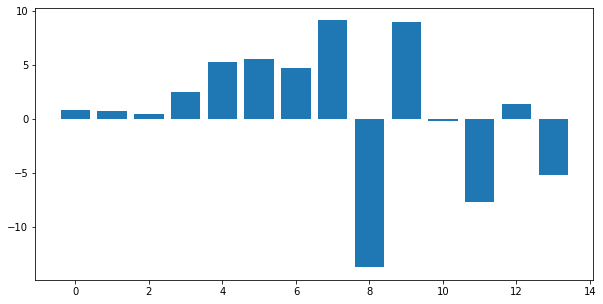

In [34]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn 
#standardizovano
# Inicijalizacija
regression_model_std = LinearRegression()

# Obuka modela
regression_model_std.fit(x_train_std, y_train)

# Testiranje
y_predicted = regression_model_std.predict(x_test_std)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
print("koeficijenti: ", regression_model_std.coef_)

Mean squared error:  296.12740299768615
Mean absolute error:  12.695579149282539
Root mean squared error:  17.20835271017206
R2 score:  0.7074640644263284
R2 adjusted score:  0.7073341474393333
        y  y_pred
0   59.00   52.02
1   18.00   28.59
2   55.00   40.87
3   41.00   46.50
4   41.00   42.14
5   79.00   58.60
6   28.00   34.66
7   72.00  108.15
8   63.00   56.68
9   13.00   20.66
10  46.00   57.19
11  28.00   43.74
12  60.00   64.75
13  53.00   75.84
14 105.00   91.07
15   8.00   26.71
16  49.00   49.25
17  17.00   24.07
18  69.00   97.80
19  15.00   23.58
koeficijenti:  [  0.77078209   0.73881707   0.42563222   2.50168415   5.22196773
   5.56614655   4.71554452   9.10021222 -13.76037715   8.97088334
  -0.21637587  -7.73605677   1.37056266  -5.19127184]


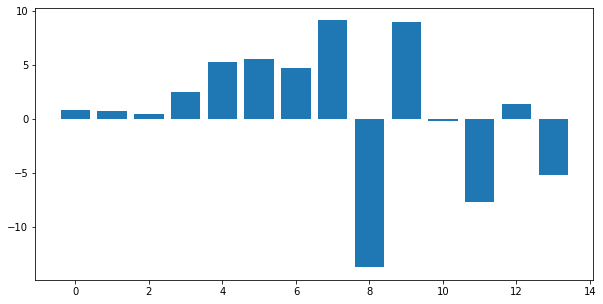

In [35]:
# Primer 5: Ridge regresija

# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_train_std, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_test_std)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  296.1518267874738
Mean absolute error:  12.694572816503173
Root mean squared error:  17.20906234480757
R2 score:  0.7074399368510906
R2 adjusted score:  0.7073100091488929
        y  y_pred
0   59.00   52.02
1   18.00   28.50
2   55.00   40.89
3   41.00   46.46
4   41.00   42.16
5   79.00   58.65
6   28.00   34.66
7   72.00  108.07
8   63.00   56.70
9   13.00   20.67
10  46.00   57.24
11  28.00   43.76
12  60.00   64.75
13  53.00   75.82
14 105.00   91.12
15   8.00   26.75
16  49.00   49.19
17  17.00   24.01
18  69.00   97.74
19  15.00   23.56
koeficijenti:  [  0.75091028   0.71047139   0.41382953   2.49567912   5.1869269
   5.586352     4.70658128   9.09592504 -13.73149171   8.86514248
  -0.17305337  -7.60042922   1.35267291  -5.16866263]


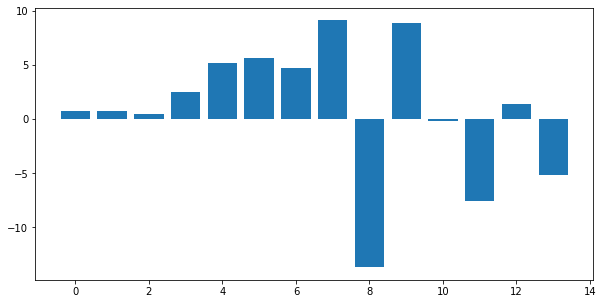

In [36]:
# Primer 6: Lasso regresija

# Lasso regresija

# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_train_std, y_train)

# Predict
y_predicted = lasso_model.predict(x_test_std)

# Evaluation
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

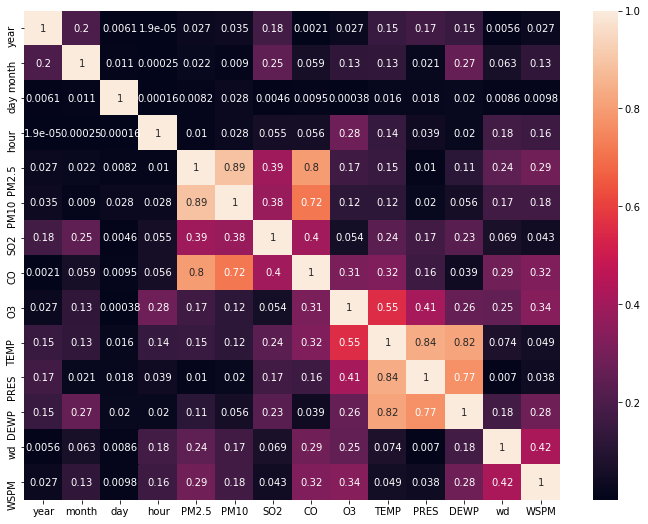

In [40]:
corr = x.corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), annot=True);

Mean squared error:  219.77278561359438
Mean absolute error:  10.937815148404292
Root mean squared error:  14.824735600124354
R2 score:  0.7828926441717818
R2 adjusted score:  0.78216741042502
        y  y_pred
0   59.00   57.42
1   18.00   22.49
2   55.00   39.92
3   41.00   46.33
4   41.00   38.29
5   79.00   64.48
6   28.00   31.93
7   72.00  108.10
8   63.00   50.65
9   13.00   13.48
10  46.00   53.92
11  28.00   46.07
12  60.00   74.17
13  53.00   75.49
14 105.00   86.39
15   8.00   19.79
16  49.00   50.49
17  17.00   20.40
18  69.00   98.23
19  15.00   21.46
koeficijenti:  [ 6.42771429e-02  1.90595120e+00  5.83311125e-01  2.07721209e+00
  9.05976876e+00  7.63226020e+00  1.67828307e+00  1.09848795e+01
 -1.73961092e+01  1.74347295e+01 -6.43419171e-01 -1.79670336e+01
  1.41645054e+00 -3.98897715e+00  1.95793181e-01 -9.96463104e-03
 -1.94883611e-02  2.89707413e-01 -2.99557915e-01  7.30208188e-02
  3.86570147e-01 -1.08354472e+00  1.96433263e+00 -5.25891186e-03
 -1.52036829e+00  5.6180

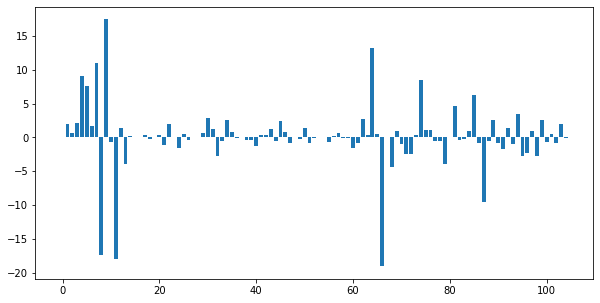

In [41]:
# Primer 4: Lin. regresija sa drugacijom hipotezom

poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...

# Inicijalizacija
regression_model_inter = LinearRegression()

# Obuka modela
regression_model_inter.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_inter.predict(x_inter_test)
 
# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

Mean squared error:  201.2708141475841
Mean absolute error:  10.458663869831268
Root mean squared error:  14.18699454245275
R2 score:  0.8011702215860173
R2 adjusted score:  0.8004171503987972
        y  y_pred
0   59.00   56.66
1   18.00   23.12
2   55.00   39.42
3   41.00   46.96
4   41.00   38.87
5   79.00   66.63
6   28.00   33.25
7   72.00  110.34
8   63.00   53.20
9   13.00   15.73
10  46.00   53.41
11  28.00   44.84
12  60.00   75.69
13  53.00   74.71
14 105.00   88.55
15   8.00   23.44
16  49.00   50.52
17  17.00   18.89
18  69.00  102.77
19  15.00   25.09
koeficijenti:  [ 1.75907340e-01  5.92199843e-01  4.89199836e-01  2.14370532e+00
  6.79397909e+00  8.07308931e+00  1.63912766e+00  1.24329093e+01
 -2.01631509e+01  2.17487790e+01 -4.93894022e-01 -1.83691748e+01
  1.79513887e+00 -3.80131015e+00 -1.01925015e+00 -1.51351599e-01
 -4.44139962e-02 -3.96934009e-01 -3.00922984e-01  4.15917900e-01
 -8.73414101e-01  1.31627129e+00  3.60841450e-01  1.09363871e+00
  6.66192382e-02 -1.2997

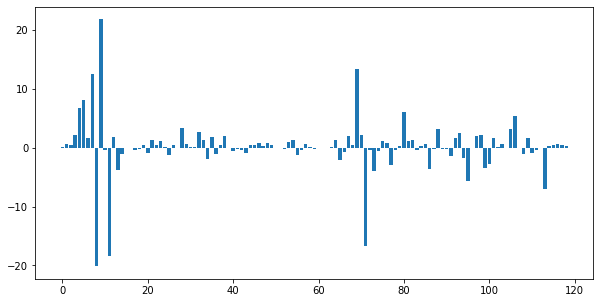

In [42]:
# Primer 4: Lin. regresija sa drugacijom hipotezom

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2

# Inicijalizacija
regression_model_degree = LinearRegression()

# Obuka modela
regression_model_degree.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_degree.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
print("koeficijenti: ", regression_model_degree.coef_)

Mean squared error:  201.30094142447766
Mean absolute error:  10.459585195799935
Root mean squared error:  14.188056294802246
R2 score:  0.8011404596962255
R2 adjusted score:  0.8003872757853387
        y  y_pred
0   59.00   56.62
1   18.00   23.16
2   55.00   39.41
3   41.00   46.92
4   41.00   38.89
5   79.00   66.61
6   28.00   33.28
7   72.00  110.37
8   63.00   53.20
9   13.00   15.72
10  46.00   53.47
11  28.00   44.82
12  60.00   75.67
13  53.00   74.70
14 105.00   88.53
15   8.00   23.55
16  49.00   50.52
17  17.00   18.86
18  69.00  102.71
19  15.00   25.09
koeficijenti:  [ 1.83299691e-01  5.96840776e-01  4.89504547e-01  2.14613795e+00
  6.74708884e+00  8.08668323e+00  1.67867874e+00  1.24128463e+01
 -2.01248157e+01  2.16213818e+01 -4.97283080e-01 -1.82582751e+01
  1.78928613e+00 -3.79473722e+00 -1.01793186e+00 -1.54172379e-01
 -4.52306282e-02 -3.93985006e-01 -2.84505803e-01  4.04100378e-01
 -8.66771366e-01  1.31304489e+00  3.58847035e-01  1.09829126e+00
  6.39327463e-02 -1.30

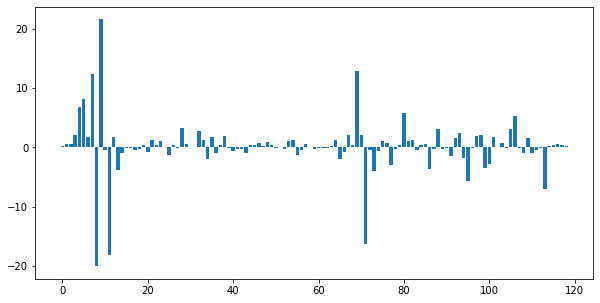

In [43]:
# Primer 5: Ridge regresija

# Inicijalizacija
ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  201.38330370970945
Mean absolute error:  10.460931197296144
Root mean squared error:  14.190958519765656
R2 score:  0.8010590963103235
R2 adjusted score:  0.8003056042342207
        y  y_pred
0   59.00   56.51
1   18.00   23.32
2   55.00   39.34
3   41.00   46.64
4   41.00   39.03
5   79.00   66.63
6   28.00   33.30
7   72.00  110.29
8   63.00   53.25
9   13.00   15.83
10  46.00   53.57
11  28.00   44.65
12  60.00   75.49
13  53.00   74.30
14 105.00   88.31
15   8.00   23.16
16  49.00   50.59
17  17.00   18.92
18  69.00  102.06
19  15.00   25.02
koeficijenti:  [ 1.96012803e-01  4.98367407e-01  4.67779818e-01  2.14051684e+00
  6.60834830e+00  8.15144648e+00  1.81717738e+00  1.22940056e+01
 -2.00904271e+01  2.12244671e+01 -3.78367991e-01 -1.78005686e+01
  1.74992187e+00 -3.76086867e+00 -9.89219667e-01 -1.15337476e-01
 -3.54882085e-02 -3.53499593e-01 -0.00000000e+00  1.23062443e-01
 -7.67536380e-01  1.21694659e+00  2.77432867e-01  1.07911623e+00
  0.00000000e+00 -1.32

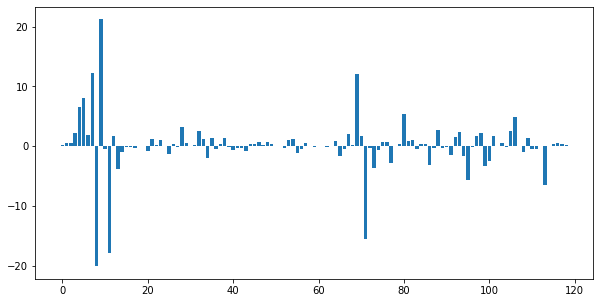

In [44]:
# Primer 6: Lasso regresija

# Lasso regresija

# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

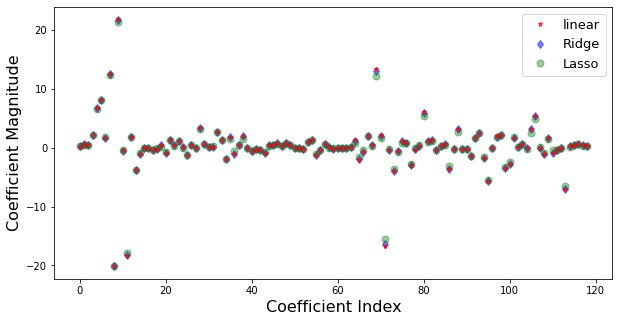

In [45]:
plt.figure(figsize=(10,5))
plt.plot(regression_model_degree.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear',zorder=7) # zorder for ordering the markers
plt.plot(ridge_model.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge') # alpha here is for transparency
plt.plot(lasso_model.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

In [ ]:

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1, 5, 7]:
    for m in ['euclidean', 'jaccard','dice']:
        indexes = kf.split(X_trening, y_trening)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_trening)),len(np.unique(y_trening))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_trening.iloc[train_index,:], y_trening.iloc[train_index])
            y_pred = classifier.predict(X_trening.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y_trening.iloc[test_index], y_pred))
            fin_conf_mat += confusion_matrix(y_trening.iloc[test_index], y_pred, labels=labels_y)
        print('za parametre k=', k, ' i m=', m, ' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        print(fin_conf_mat)
        acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))